<a href="https://colab.research.google.com/github/victorviro/Machine-Learning-Python/blob/master/Machine_Learning_Interpretability_with_InterpretML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importance of Interpretability

As machine learning has matured into wide-spread adoption, building models that users can understand is becoming increasingly important. This can easily be observed in high-risk applications such as healthcare or finance environments. Interpretability is also important in generally applied machine learning problems such as model debugging (Why did my model make this mistake?), regulatory compliance (Does my model satisfy legal requirements?), human-computer interaction (How can I understand and trust the model's decisions?) and fairness detection (Does my model discriminate?).

Until a little time ago, it was a tradeoff between performance and interpretability, that is we had to choose between an interpretable model admitting a lower performance (*glassbox*" model) like a decision tree and a more complex model with higher performance and lower interpretability ("*blackbox*" model) like a random forest. However, in the last few years, some techniques, strategies, and packages have been introduced that allow us to interpret blackbox models.

There are two levels of interpretations:
- Global: how our model works generally? how our model make predictions? how the individual features influence generally in our model to make predictions?
- Local: why the model make this prediction for a particular input?



# Methods

Some of the strategies or techniques which allow us to interpret our model are:

- **Interpretable models**. The easiest way to achieve interpretability is to use only a subset of algorithms that create interpretable models. Linear regression, logistic regression, and the decision tree are commonly used, interpretable models.

- **Feature importance**. It allows us to know what features have the biggest impact on predictions (more important features have a bigger impact). Intuitively, if a feature is important, then when missing, the accuracy of the model would decrease. Permutation feature importance measures the increase in the prediction error of the model after we permuted the feature's values, which breaks the relationship between the feature and the true outcome.

- **Partial dependence plots (PDP)**. The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a model.

- **Global surrogate models**. A global surrogate model is an interpretable model that is trained to approximate the predictions of a black-box model. We can conclude the black-box model by interpreting the surrogate model. Solving machine learning interpretability by using more machine learning!

# Packages

## LIME

Local interpretable model-agnostic explanations ([LIME](https://arxiv.org/abs/1602.04938)) is an algorithm that can explain the predictions of any classifier or regressor in a faithful way, by approximating it locally with an interpretable model. 

Instead of training a global surrogate model, LIME focuses on training local surrogate models to explain individual predictions. The idea is quite intuitive. First, forget about the training data and imagine we only have the black-box model where we can input data points and get the predictions of the model. We can probe the box as often as we want. Our goal is to understand why the machine learning model made a certain prediction. LIME tests what happens to the predictions when we give variations of our data into the machine learning model. LIME generates a new dataset consisting of permuted samples and the corresponding predictions of the black-box model. On this new dataset LIME then trains an interpretable model, which is weighted by the proximity of the sampled instances to the instance of interest. The interpretable model can be, for example, Lasso or a decision tree. The learned model should be a good approximation of the machine learning model predictions locally, but it does not have to be a good global approximation.

Some tutorials can be found on the GitHub [repository](https://github.com/marcotcr/lime) of the package.

## SHAP

SHapley Additive exPlanations ([SHAP](https://github.com/slundberg/shap)) is a method to explain individual predictions. SHAP is based on the game theoretically optimal *Shapley Values*.

A prediction can be explained by assuming that each feature value of the instance is a "player" in a game where the prediction is the payout. Shapley values, a method from coalitional game theory, tells us how to fairly distribute the "payout" among the features.

For a further explanation see this [article](https://christophm.github.io/interpretable-ml-book/shap.html).

## Interpret

[InterpretML](https://github.com/interpretml/interpret) is an open-source Python package that exposes machine learning interpretability algorithms. This package covers two major interpretability forms: "*glass-box*" models, which are inherently intelligible and explainable to the user, and "*black-box*" interpretability, methods that generate explanations for any machine learning pipeline, no matter how opaque it is. This is further supported with interactive visualizations and a built-in dashboard designed for interpretability algorithm comparison. InterpretML emphasizes extensibility and compatibility with popular open-source projects such as scikit-learn and Jupyter Notebook environments.

### Example code

#### Load libraries

In [ ]:
!pip install interpret

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### Prepare dataset

In [ ]:
# Description of the dataset: https://archive.ics.uci.edu/ml/datasets/Adult

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
train_cols = df.columns[0:-1]
label = df.columns[-1]


In [ ]:
X = df[train_cols]
y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #convert to 0 or 1 if >50k
print(X.shape)
X.head()

(32561, 14)


,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
# Transform categorical features
X_enc = pd.get_dummies(X, prefix_sep='.')
feature_names = list(X_enc.columns)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.20, random_state=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

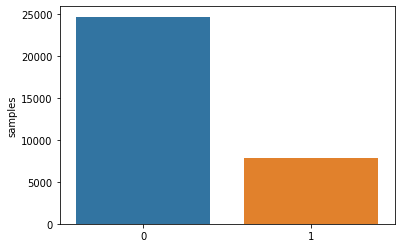

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check unbalanced dataset
counts_target = y.value_counts()
sns.barplot(counts_target.index,counts_target)
plt.ylabel('samples')

#### Train a blackbox classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler()
rf = RandomForestClassifier(n_estimators=100)
# define pipeline
blackbox_model = Pipeline(steps=[('under', under), ('model', rf)])
blackbox_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('under',
                 RandomUnderSampler(random_state=None, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, ran

In [ ]:
# performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = blackbox_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4025 1001]
 [ 248 1239]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      5026
           1       0.55      0.83      0.66      1487

    accuracy                           0.81      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



In [ ]:
from interpret import show
from interpret.perf import ROC

blackbox_perf = ROC(blackbox_model.predict_proba).explain_perf(X_test, y_test, name='BlackBox Model')
show(blackbox_perf)

/usr/local/lib/python3.6/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


#### Local interpretation with LIME

In [ ]:
from interpret.blackbox import LimeTabular
from interpret import show

# We need a prediction function and optionally a dataset
lime = LimeTabular(predict_fn=blackbox_model.predict_proba, data=X_train)

# We select the instances to explain and we can pass the labels if we have them
lime_local = lime.explain_local(X_test[:5], y_test[:5], name='LIME')

show(lime_local)

#### Global Intepretability with PDP

In [ ]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependencies')

show(pdp_global)

# References

- [InterpretML Github](https://github.com/interpretml/interpret)

- [InterpretML: A Unified Framework for Machine Learning Interpretability Paper](https://arxiv.org/abs/1909.09223)

- ["Why Should I Trust You?": Explaining the Predictions of Any Classifier](https://arxiv.org/abs/1602.04938)

- [LIME](https://github.com/marcotcr/lime)

- [SHAP](https://github.com/slundberg/shap)

- [Interpretable ML book article](https://christophm.github.io/interpretable-ml-book/)

- [Model explanability with shapley additive explanations SHAP](http://bjlkeng.github.io/posts/model-explanability-with-shapley-additive-explanations-shap/)